In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from natsort import natsorted
import pandas as pd
from collections import Counter

In [ ]:
from google.colab import drive 
drive.mount('/mntDrive') 

Mounted at /mntDrive


In [ ]:
path1 = '/content/drive/MyDrive/ML Project/classProject01'
df = pd.DataFrame(columns = ['Img1_Name', 'Img2_Name', 'Person1_ID', 'Person2_ID', "Genuine?", "Score"])

orb = cv2.ORB_create() 
bf = cv2.BFMatcher()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    img1 = os.path.join(path1, images)
    img1 = cv2.imread(img1)
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    kp1, des1 = orb.detectAndCompute(img1,None)
    if len(kp1)>0:
        for image in natsorted(os.listdir(path1)):
            img2 = os.path.join(path1, image)
            str2 = str(image)
            if (img1 != img2): 
                img2 = cv2.imread(img2) 
                img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
                kp2, des2 = orb.detectAndCompute(img2,None)
            # Initiate SIFT detector
            #sift = cv2.SIFT()            
            # find the keypoints and descriptors with SIFT
            # BFMatcher with default params
                if (len(kp1)!=0 and len(kp2)!=0 and len(kp1)!=1 and len(kp2)!=1):
                    matches12 = bf.knnMatch(des1,des2, k=2)
                    matches21 = bf.knnMatch(des2,des1, k=2)
                #----------------------------------------------
                    number_keypoints = max(len(kp1),len(kp2))
                    good12 = []
                    good21 = []
                    for m,n in matches12:
                        if m.distance < 0.8*n.distance:
                            good12.append([m])
                    for m,n in matches21:
                        if m.distance < 0.8*n.distance:
                            good21.append([m])

                    score = min(len(good12)/number_keypoints, len(good21)/number_keypoints)
                    ID1=str1.split("_")[0]
                    ID2=str2.split("_")[0]
                    new_row={'Img1_Name':str1, 'Img2_Name':str2, 'Person1_ID':ID1 ,'Person2_ID':ID2 ,"Genuine?":ID1==ID2, 'Score':score}
                    df = df.append(new_row, ignore_index = True) 
                    print(str1 + " " + str2 + " " + str(score)) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  app.launch_new_instance()


Streaming output truncated to the last 5000 lines.
29_P2_S2_1.jpg 11_P2_S1_1.jpg 0.0
29_P2_S2_1.jpg 11_P2_S1_2.jpg 0.006211180124223602
29_P2_S2_1.jpg 11_P2_S1_3.jpg 0.0
29_P2_S2_1.jpg 11_P2_S1_4.jpg 0.0
29_P2_S2_1.jpg 11_P2_S1_5.jpg 0.0
29_P2_S2_1.jpg 11_P2_S2_1.jpg 0.0
29_P2_S2_1.jpg 11_P2_S2_2.jpg 0.0
29_P2_S2_1.jpg 11_P2_S2_3.jpg 0.0
29_P2_S2_1.jpg 11_P2_S2_4.jpg 0.01910828025477707
29_P2_S2_1.jpg 11_P2_S2_5.jpg 0.0
29_P2_S2_1.jpg 12_P1_S1_1.jpg 0.0
29_P2_S2_1.jpg 12_P1_S1_2.jpg 0.0
29_P2_S2_1.jpg 12_P1_S1_4.jpg 0.0
29_P2_S2_1.jpg 12_P1_S1_5.jpg 0.0
29_P2_S2_1.jpg 12_P2_S1_1.jpg 0.003355704697986577
29_P2_S2_1.jpg 12_P2_S1_2.jpg 0.0
29_P2_S2_1.jpg 12_P2_S1_3.jpg 0.0
29_P2_S2_1.jpg 12_P2_S1_4.jpg 0.0
29_P2_S2_1.jpg 12_P2_S1_5.jpg 0.009708737864077669
29_P2_S2_1.jpg 12_P2_S2_1.jpg 0.0
29_P2_S2_1.jpg 12_P2_S2_2.jpg 0.0
29_P2_S2_1.jpg 12_P2_S2_3.jpg 0.0
29_P2_S2_1.jpg 12_P2_S2_4.jpg 0.019417475728155338
29_P2_S2_1.jpg 12_P2_S2_5.jpg 0.0
29_P2_S2_1.jpg 13_P1_S1_2.jpg 0.0
29_P2_S2_1.jpg 

In [ ]:
df.to_csv('/content/drive/MyDrive/ML Project/run5.csv')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML Project/run5.csv')

In [ ]:
df.head()

,Unnamed: 0,Img1_Name,Img2_Name,Person1_ID,Person2_ID,Genuine?,Score
0,0,1_P1_S1_1.jpg,1_P1_S1_1.jpg,1,1,True,1.00000
1,1,1_P1_S1_1.jpg,1_P1_S1_2.jpg,1,1,True,0.00000
2,2,1_P1_S1_1.jpg,1_P1_S1_4.jpg,1,1,True,0.00000
3,3,1_P1_S1_1.jpg,1_P1_S1_5.jpg,1,1,True,0.02381
4,4,1_P1_S1_1.jpg,1_P1_S2_1.jpg,1,1,True,0.00000


In [ ]:
ct=0
df=df[df['Score'] != 1.0]
       
for i in list(set(df['Img1_Name'])):
    df_temp=df[df['Img1_Name']==i]
    maxScore=max(df_temp['Score'])
    maxScore_indices = [k for k, x in enumerate(df_temp['Score']) if x == maxScore]
    for j in maxScore_indices:
        if (str(df_temp.iloc[j]['Person2_ID'])==i.split('_')[0]):            
            ct=ct+1
            break
print("CRR = "+ str(ct/len(list(set(df['Img1_Name'])))))

CRR = 0.4021276595744681


In [ ]:
genuine=[df['Score'][i] for i in df.index if df['Genuine?'][i]]
imposter=[df['Score'][i] for i in df.index if df['Genuine?'][i]==False]
genuine_counter=Counter(genuine)
imposter_counter=Counter(imposter)
genuine_counter.pop(0)
imposter_counter.pop(0)

112302

In [ ]:
genuine_max=max(list(genuine_counter.values()))
imposter_max=max(list(imposter_counter.values()))

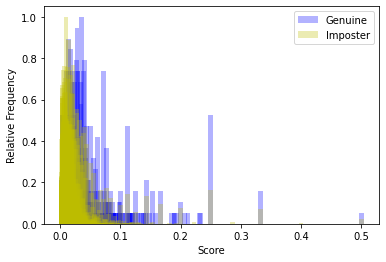

In [ ]:
# genuine_imposter_hist
plt.bar(list(genuine_counter.keys()), np.array(list(genuine_counter.values()))/genuine_max,color='b',width=0.008, alpha=0.3, label='Genuine')
plt.bar(list(imposter_counter.keys()), np.array(list(imposter_counter.values()))/imposter_max, color='y',width=0.008, alpha=0.3, label='Imposter')
plt.xlabel('Score') 
plt.ylabel('Relative Frequency')
plt.legend()
plt.savefig('/content/drive/MyDrive/ML Project/run5 genuine_imposter_hist.png')

In [ ]:
df_th=df.copy()
threshold_list=np.round_(np.arange (0.001, 1, 0.002), decimals = 3) 
for th in threshold_list:
    th_str=str(th)
    true_index_list=df_th.Score[df_th.Score>th].index
    df_th['Th='+th_str]=False
    df_th.loc[true_index_list,'Th='+th_str] = True

In [ ]:
dict_th={}
dict_eer={}
neg=len(df_th[df_th['Genuine?'] == False])
pos=len(df_th[df_th['Genuine?'] == True])  
graph_fp=[]
graph_tp=[]
graph_far=[]
graph_frr=[]
for th in threshold_list:
    count_fp=0
    count_tp=0
    count_far=0
    count_frr=0
    th_str=str(th)
    genuine_np= np.array(df_th['Genuine?'])
    th_np=np.array(df_th['Th='+th_str])
    
    
    fp=np.logical_and(genuine_np==False,th_np==True)
    unique, counts = np.unique(fp, return_counts=True)
    if True in dict(zip(unique, counts)):
        count_fp=dict(zip(unique, counts))[True]
    else:
        count_fp=0
    
    tp=np.logical_and(genuine_np==True,th_np==True)
    unique, counts = np.unique(tp, return_counts=True)
    if True in dict(zip(unique, counts)):
        count_tp=dict(zip(unique, counts))[True]
    else:
        count_tp=0
    
    far=np.logical_and(genuine_np==False,th_np==True)
    unique, counts = np.unique(far, return_counts=True)
    if True in dict(zip(unique, counts)):
        count_far=dict(zip(unique, counts))[True]
    else:
        count_far=0
    
    frr=np.logical_and(genuine_np==True,th_np==False)
    unique, counts = np.unique(frr, return_counts=True)
    if True in dict(zip(unique, counts)):
        count_frr=dict(zip(unique, counts))[True]
    else:
        count_frr=0
    
    dict_th[th]=[count_fp/neg,count_tp/pos]
    graph_fp.append(dict_th[th][0])
    graph_tp.append(dict_th[th][1])
    dict_eer[th]=[count_far/neg,count_frr/pos]
    graph_far.append(dict_eer[th][0])
    graph_frr.append(dict_eer[th][1])

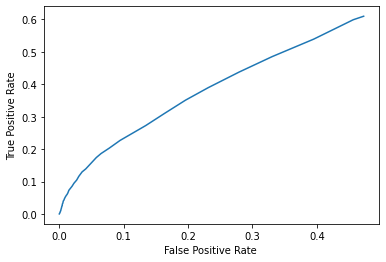

In [ ]:
# tp_fp
plt.plot(graph_fp, graph_tp) 
plt.xlabel('False Positive Rate ') 
plt.ylabel('True Positive Rate')
plt.savefig('/content/drive/MyDrive/ML Project/run5 tp_fp.png')

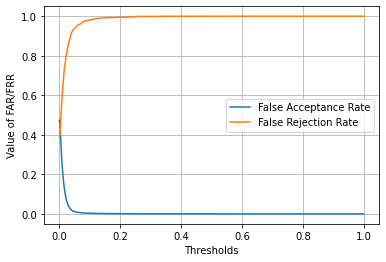

In [ ]:
# far/frr_threshold
plt.plot(threshold_list, graph_far, label='False Acceptance Rate')
plt.plot(threshold_list, graph_frr, label='False Rejection Rate')
plt.xlabel("Thresholds")
plt.ylabel("Value of FAR/FRR")
plt.legend()
plt.grid()
plt.savefig('/content/drive/MyDrive/ML Project/run5 eer.png')

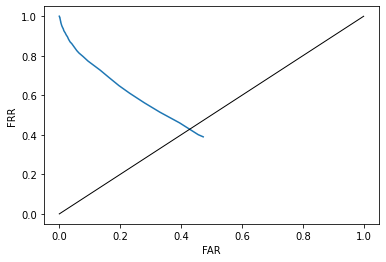

In [ ]:
# roc
plt.plot(graph_far, graph_frr)
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 1)
plt.xlabel("FAR")
plt.ylabel("FRR")
plt.savefig('/content/drive/MyDrive/ML Project/run5 roc.png')

In [ ]:
df_perf_para= pd.DataFrame(columns = ['Threshold', 'FP Rate', 'TP Rate', 'FAR', 'FRR']) 
for th in threshold_list:
    new_row={'Threshold':th, 'FP Rate':dict_th[th][0], 'TP Rate':dict_th[th][1], 'FAR':dict_eer[th][0], 'FRR':dict_eer[th][1]}
    df_perf_para = df_perf_para.append(new_row, ignore_index = True) 

In [ ]:
df_perf_para['Accuracy']=[100-((df_perf_para['FAR'][i]+df_perf_para['FRR'][i])*100)/2 for i in df_perf_para.index]

In [ ]:
eer_index=np.argmin(np.abs(np.array(df_perf_para['FAR'])-np.array(df_perf_para['FRR'])))
print('FAR at Equal Error Rate= '+ str(df_perf_para.iloc[eer_index]['FAR']))
print('FRR at Equal Error Rate= '+ str(df_perf_para.iloc[eer_index]['FRR']))
print('Threshold at Equal Error Rate= '+ str(df_perf_para.iloc[eer_index]['Threshold']))
print('Accuracy= '+str(max(df_perf_para['Accuracy']))+'%')

FAR at Equal Error Rate= 0.45662726393570374
FRR at Equal Error Rate= 0.4007551240560949
Threshold at Equal Error Rate= 0.003
Accuracy= 57.92218125475017%


In [ ]:
df_perf_para.to_csv('/content/drive/MyDrive/ML Project/performance5.csv')

In [ ]:
df_perf_para

,Threshold,FP Rate,TP Rate,FAR,FRR,Accuracy
0,0.001,0.472795,0.610032,0.472795,0.389968,56.861857
1,0.003,0.456627,0.599245,0.456627,0.400755,57.130881
2,0.005,0.395195,0.539374,0.395195,0.460626,57.208982
3,0.007,0.330654,0.485437,0.330654,0.514563,57.739129
4,0.009,0.279259,0.437702,0.279259,0.562298,57.922181
...,...,...,...,...,...,...
495,0.991,0.000000,0.000000,0.000000,1.000000,50.000000
496,0.993,0.000000,0.000000,0.000000,1.000000,50.000000
497,0.995,0.000000,0.000000,0.000000,1.000000,50.000000
498,0.997,0.000000,0.000000,0.000000,1.000000,50.000000
